## Objective 

The objective of this project is to conduct a comprehensive analysis of hospital performance scores to gain insights into healthcare quality across different regions. This involves exploring and cleaning the dataset to handle any inconsistencies and converting data types as needed. The analysis includes computing summary statistics, examining the distribution of scores, and evaluating performance trends over time by various categories such as hospital, state, and county. By comparing scores against national benchmarks and analyzing variability by address, ZIP code, and phone number, the project aims to identify top-performing and underperforming hospitals. Visualization techniques, including bar plots, box plots, and line plots, will be used to effectively communicate findings and provide actionable recommendations for improving hospital performance.

## Import Libraries

In [4]:
import pandas as pd 
import numpy as np 

In [6]:
# Data Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
# warning remove alerts
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [11]:
data = pd.read_csv('Healthcare Associated Infections.csv')

### Starting 5 rows 

In [14]:
# Display the first few rows of each dataset
data.head()

Provider ID                  Hospital Name                     Address  \
0        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
1        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
3        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
4        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   

   City State  ZIP Code County Name  Phone Number  \
0  BOAZ    AL     35957    MARSHALL    2565938310   
1  BOAZ    AL     35957    MARSHALL    2565938310   
2  BOAZ    AL     35957    MARSHALL    2565938310   
3  BOAZ    AL     35957    MARSHALL    2565938310   
4  BOAZ    AL     35957    MARSHALL    2565938310   

                     Measure Name       Measure ID  \
0  CLABSI: Lower Confidence Limit   HAI_1_CI_LOWER   
1  CLABSI: Upper Confidence Limit   HAI_1_CI_UPPER   
2    CLABSI: Number of Procedures  HAI_1_DOPC_DAYS   
3         CLABSI: Predicted Cases  HAI_1_ELIGCASES   
4          CLABSI: Observed Cases  HAI_1_NUMERATOR   

                   Compared to National  Score Footnote Measure Start Date  \
0  No Different than National Benchmark  0.165      NaN         01/01/2015   
1  No Different than National Benchmark  3.249      NaN         01/01/2015   
2  No Different than National Benchmark   1485      NaN         01/01/2015   
3  No Different than National Benchmark  2.034      NaN         01/01/2015   
4  No Different than National Benchmark      2      NaN         01/01/2015   

  Measure End Date                                      Location  
0       06/30/2015  2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n  
1       06/30/2015  2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n  
2       06/30/2015  2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n  
3       06/30/2015  2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n  
4       06/30/2015  2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n

### End 5 rows 

In [17]:
data.tail()

Provider ID                           Hospital Name  \
222859       351325                      ST LUKE'S HOSPITAL   
222860       471303  NORTHEASTERN VERMONT REGIONAL HOSPITAL   
222861       150026               IU HEALTH GOSHEN HOSPITAL   
222862        50038       SANTA CLARA VALLEY MEDICAL CENTER   
222863       140217  PRESENCE SAINT JOSEPH HOSPITAL - ELGIN   

                        Address             City State  ZIP Code  County Name  \
222859            702 1ST ST SW           CROSBY    ND     58730       DIVIDE   
222860      1315 HOSPITAL DRIVE  SAINT JOHNSBURY    VT      5819    CALEDONIA   
222861        200 HIGH PARK AVE           GOSHEN    IN     46526      ELKHART   
222862  751 SOUTH BASCOM AVENUE         SAN JOSE    CA     95128  SANTA CLARA   
222863      77 N AIRLITE STREET            ELGIN    IL     60123         KANE   

        Phone Number                   Measure Name       Measure ID  \
222859    7019656384          CAUTI: Observed Cases  HAI_2_NUMERATOR   
222860    8027487400  C.diff Lower Confidence Limit   HAI_6_CI_LOWER   
222861    5743641000   CLABSI: Number of Procedures  HAI_1_DOPC_DAYS   
222862    4088855000     SSI: Colon Predicted Cases  HAI_3_ELIGCASES   
222863    8476953200    MRSA Lower Confidence Limit   HAI_5_CI_LOWER   

                        Compared to National          Score  \
222859                         Not Available  Not Available   
222860                         Not Available  Not Available   
222861  No Different than National Benchmark           1416   
222862     Worse than the National Benchmark          3.246   
222863  No Different than National Benchmark          0.219   

                                                 Footnote Measure Start Date  \
222859  5 - Results are not available for this reporti...         01/01/2015   
222860  5 - Results are not available for this reporti...         07/01/2014   
222861                                                NaN         01/01/2015   
222862                                                NaN         07/01/2014   
222863                                                NaN         07/01/2014   

       Measure End Date                                           Location  
222859       06/30/2015  702 1ST ST SW\nCROSBY, ND 58730\n(48.906708, -...  
222860       06/30/2015  1315 HOSPITAL DRIVE\nSAINT JOHNSBURY, VT 05819...  
222861       06/30/2015  200 HIGH PARK AVE\nGOSHEN, IN 46526\n(41.56432...  
222862       06/30/2015  751 SOUTH BASCOM AVENUE\nSAN JOSE, CA 95128\n(...  
222863       06/30/2015  77 N AIRLITE STREET\nELGIN, IL 60123\n(42.0362...

## Information about data

### Shape

In [21]:
data.shape

(222864, 16)

### Size 

In [24]:
data.size 

3565824

### Columns 

In [27]:
data.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Measure Name', 'Measure ID',
       'Compared to National', 'Score', 'Footnote', 'Measure Start Date',
       'Measure End Date', 'Location'],
      dtype='object')

### Info

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222864 entries, 0 to 222863
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Provider ID           222864 non-null  int64 
 1   Hospital Name         222864 non-null  object
 2   Address               222864 non-null  object
 3   City                  222864 non-null  object
 4   State                 222864 non-null  object
 5   ZIP Code              222864 non-null  int64 
 6   County Name           222240 non-null  object
 7   Phone Number          222864 non-null  int64 
 8   Measure Name          222864 non-null  object
 9   Measure ID            222864 non-null  object
 10  Compared to National  222864 non-null  object
 11  Score                 222864 non-null  object
 12  Footnote              141684 non-null  object
 13  Measure Start Date    222864 non-null  object
 14  Measure End Date      222864 non-null  object
 15  Location         

### Dtypes 

In [33]:
data.dtypes

Provider ID              int64
Hospital Name           object
Address                 object
City                    object
State                   object
ZIP Code                 int64
County Name             object
Phone Number             int64
Measure Name            object
Measure ID              object
Compared to National    object
Score                   object
Footnote                object
Measure Start Date      object
Measure End Date        object
Location                object
dtype: object

In [35]:
# Convert 'Score' to numeric, coercing errors to NaN
data['Score'] = pd.to_numeric(data['Score'], errors='coerce')

In [37]:
data.dtypes

Provider ID               int64
Hospital Name            object
Address                  object
City                     object
State                    object
ZIP Code                  int64
County Name              object
Phone Number              int64
Measure Name             object
Measure ID               object
Compared to National     object
Score                   float64
Footnote                 object
Measure Start Date       object
Measure End Date         object
Location                 object
dtype: object

In [39]:
# Display unique values and check for non-numeric entries
unique_scores = data['Score'].unique()
print(unique_scores)

[1.65000e-01 3.24900e+00 1.48500e+03 ... 1.02469e+02 1.67790e+04
 2.35350e+01]


### Check Duplicates 

In [42]:
data.duplicated() 

0         False
1         False
2         False
3         False
4         False
          ...  
222859    False
222860    False
222861    False
222862    False
222863    False
Length: 222864, dtype: bool

In [43]:
data[data.duplicated()]     # To check row wise and detect the Duplicate rows

Empty DataFrame
Columns: [Provider ID, Hospital Name, Address, City, State, ZIP Code, County Name, Phone Number, Measure Name, Measure ID, Compared to National, Score, Footnote, Measure Start Date, Measure End Date, Location]
Index: []

### Check Null Values 

In [47]:
data.isnull().sum()

Provider ID                  0
Hospital Name                0
Address                      0
City                         0
State                        0
ZIP Code                     0
County Name                624
Phone Number                 0
Measure Name                 0
Measure ID                   0
Compared to National         0
Score                   124717
Footnote                 81180
Measure Start Date           0
Measure End Date             0
Location                     0
dtype: int64

In [49]:
## Fill NaN values with the mean of the 'Score'
data['Score'].fillna(data['Score'].mean(), inplace=True)

In [51]:
# Fill missing 'County Name' with 'Unknown'
data['County Name'].fillna('Unknown', inplace=True)

In [53]:
# Drop the 'Footnote' column or fill it with 'No Footnote'
data['Footnote'].fillna('No Footnote', inplace=True)

In [55]:
# Re-check missing values after cleaning
data.isnull().sum()

Provider ID             0
Hospital Name           0
Address                 0
City                    0
State                   0
ZIP Code                0
County Name             0
Phone Number            0
Measure Name            0
Measure ID              0
Compared to National    0
Score                   0
Footnote                0
Measure Start Date      0
Measure End Date        0
Location                0
dtype: int64

## Exploratory Data Analysis (EDA)

### 1. Summary Statistics

In [59]:
# Calculate mean, median, and mode of the 'Score'
score_mean = data['Score'].mean()
score_median = data['Score'].median()
score_mode = data['Score'].mode()[0]

print(f"Mean Score: {score_mean}")
print(f"Median Score: {score_median}")
print(f"Mode Score: {score_mode}")

Mean Score: 3333.03549547108
Median Score: 3333.03549547108
Mode Score: 3333.03549547108


### 2. Unique Values Analysis

In [62]:
# Unique values in 'State', 'Measure_Name', and 'Measure_ID'
unique_states = data['State'].nunique()
unique_measures = data['Measure Name'].nunique()
unique_measure_ids = data['Measure ID'].nunique()

print(f"Unique States: {unique_states}")
print(f"Unique Measure Names: {unique_measures}")
print(f"Unique Measure IDs: {unique_measure_ids}")

Unique States: 55
Unique Measure Names: 48
Unique Measure IDs: 48


### 3. Score Analysis

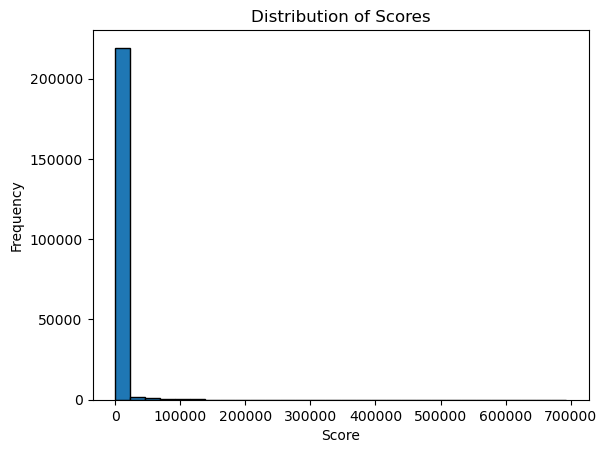

In [65]:
# Histogram for 'Score'
plt.hist(data['Score'], bins=30, edgecolor='black')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

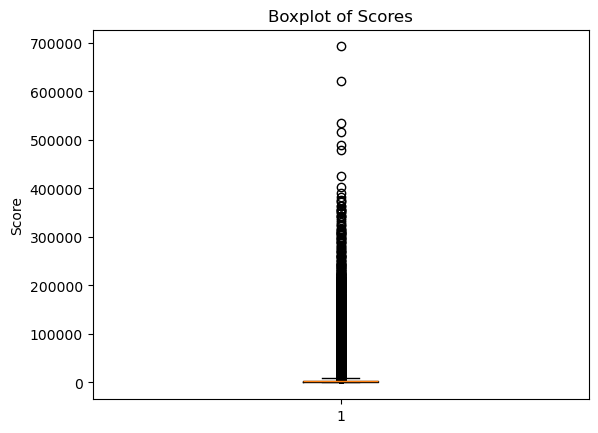

In [67]:
# Boxplot for 'Score'
plt.boxplot(data['Score'].dropna())
plt.title('Boxplot of Scores')
plt.ylabel('Score')
plt.show()

### 4. Measure Performance Analysis

In [70]:
# Group by 'Measure_Name' and calculate mean, median, mode
measure_stats = data.groupby('Measure Name')['Score'].agg(['mean', 'median', lambda x: x.mode()[0]])

print(measure_stats)

                                                            mean  \
Measure Name                                                       
C.diff Lower Confidence Limit                        1257.314584   
C.diff Observed Cases                                1017.865231   
C.diff Patient Days                                 31782.131869   
C.diff Predicted Cases                               1019.421689   
C.diff Upper Confidence Limit                         997.531675   
CAUTI Lower Confidence Limit                         2030.270196   
CAUTI Observed Cases                                 1707.401730   
CAUTI Predicted Cases                                1707.974128   
CAUTI Upper Confidence Limit                         1704.545446   
CAUTI Urinary Catheter Days                          3967.106662   
CAUTI: Lower Confidence Limit                        1997.903965   
CAUTI: Number of Procedures                          3813.002715   
CAUTI: Observed Cases                           

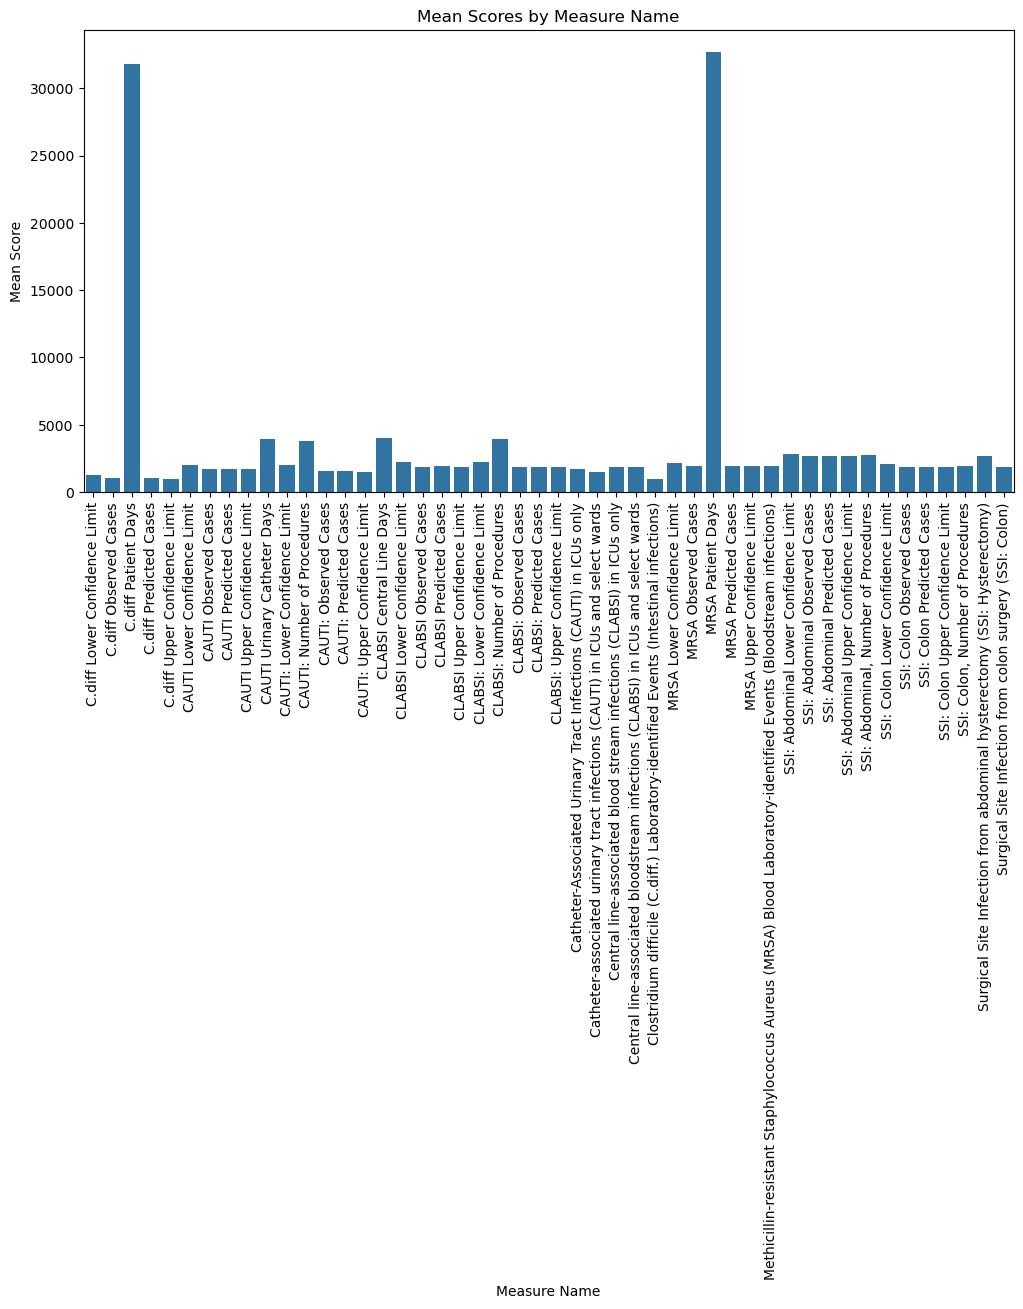

In [72]:
# Bar plot for mean scores by Measure_Name
plt.figure(figsize=(12, 6))
sns.barplot(x=measure_stats.index, y='mean', data=measure_stats)
plt.xticks(rotation=90)
plt.title('Mean Scores by Measure Name')
plt.xlabel('Measure Name')
plt.ylabel('Mean Score')
plt.show()

### 5. Top and Bottom Hospitals

In [75]:
# Top 10 Hospitals
top_hospitals = data.nlargest(10, 'Score')[['Hospital Name', 'Score']]
print("Top 10 Hospitals by Score:")
print(top_hospitals)

Top 10 Hospitals by Score:
                         Hospital Name     Score
23121   NEW YORK-PRESBYTERIAN HOSPITAL  692659.0
82346   NEW YORK-PRESBYTERIAN HOSPITAL  620882.0
149217                FLORIDA HOSPITAL  534656.0
205193                FLORIDA HOSPITAL  516090.0
49643        MONTEFIORE MEDICAL CENTER  488902.0
154625       MONTEFIORE MEDICAL CENTER  479291.0
40869                   ORLANDO HEALTH  426543.0
200945              METHODIST HOSPITAL  402920.0
175995       JACKSON MEMORIAL HOSPITAL  391024.0
206551                  ORLANDO HEALTH  382077.0


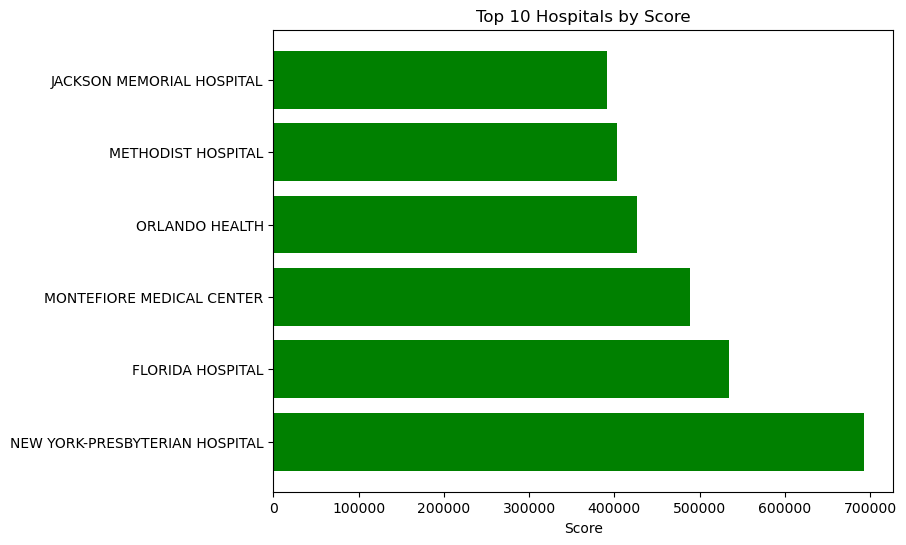

In [77]:
# Bar plot for top hospitals
plt.figure(figsize=(8, 6))
plt.barh(top_hospitals['Hospital Name'], top_hospitals['Score'], color='green')
plt.title('Top 10 Hospitals by Score')
plt.xlabel('Score')
plt.show()

In [79]:
# Bottom 10 Hospitals
bottom_hospitals = data.nsmallest(10, 'Score')[['Hospital Name', 'Score']]
print("Bottom 10 Hospitals by Score:")
print(bottom_hospitals)

Bottom 10 Hospitals by Score:
                       Hospital Name  Score
64    DEKALB REGIONAL MEDICAL CENTER    0.0
65    DEKALB REGIONAL MEDICAL CENTER    0.0
70    DEKALB REGIONAL MEDICAL CENTER    0.0
71    DEKALB REGIONAL MEDICAL CENTER    0.0
156         CRESTWOOD MEDICAL CENTER    0.0
157         CRESTWOOD MEDICAL CENTER    0.0
1025  OUACHITA COUNTY MEDICAL CENTER    0.0
1026  OUACHITA COUNTY MEDICAL CENTER    0.0
1156  SAN GORGONIO MEMORIAL HOSPITAL    0.0
1157  SAN GORGONIO MEMORIAL HOSPITAL    0.0


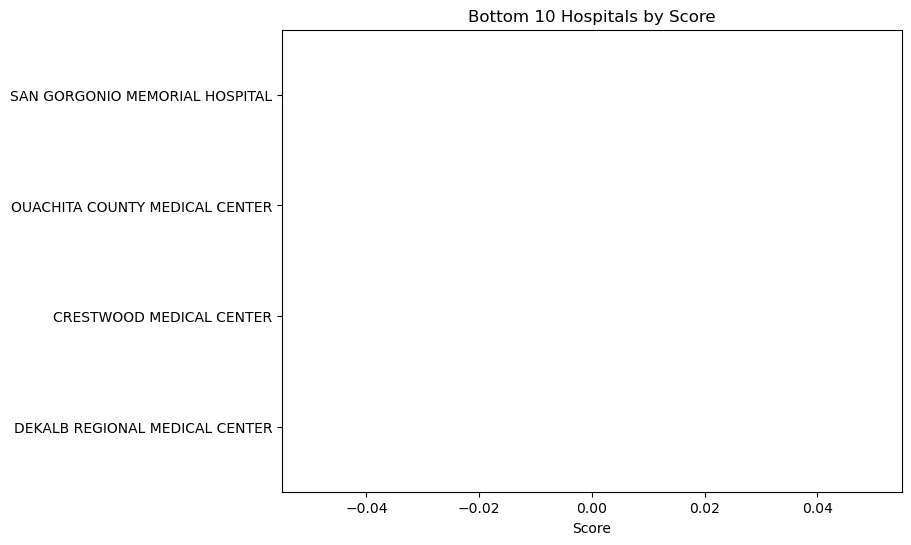

In [81]:
# Bar plot for bottom hospitals
plt.figure(figsize=(8, 6))
plt.barh(bottom_hospitals['Hospital Name'], bottom_hospitals['Score'], color='red')
plt.title('Bottom 10 Hospitals by Score')
plt.xlabel('Score')
plt.show()

### 6. State-wise Score Distribution

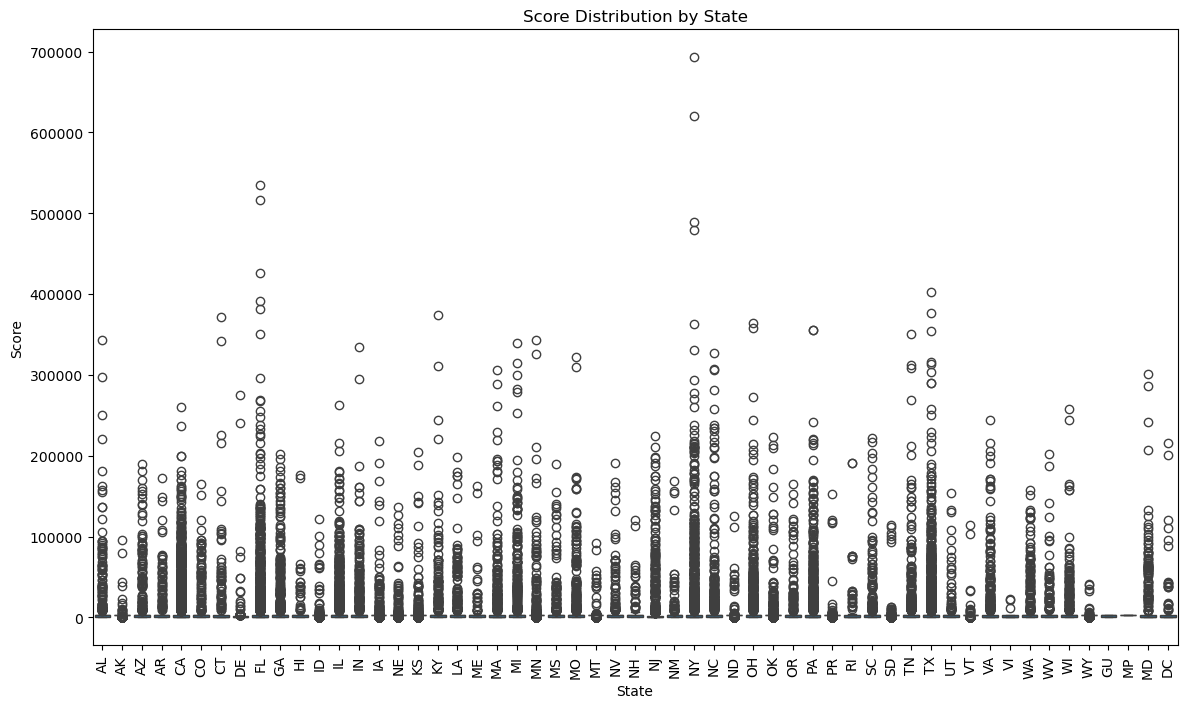

In [84]:
# Boxplot of Score by State
plt.figure(figsize=(14, 8))
sns.boxplot(x='State', y='Score', data=data)
plt.xticks(rotation=90)
plt.title('Score Distribution by State')
plt.xlabel('State')
plt.ylabel('Score')
plt.show()

### 7. County-wise Score Distribution

In [87]:
# Aggregate counties with few data points into 'Other'
top_counties = data['County Name'].value_counts().nlargest(10).index
data['County Name'] = data['County Name'].apply(lambda x: x if x in top_counties else 'Other')

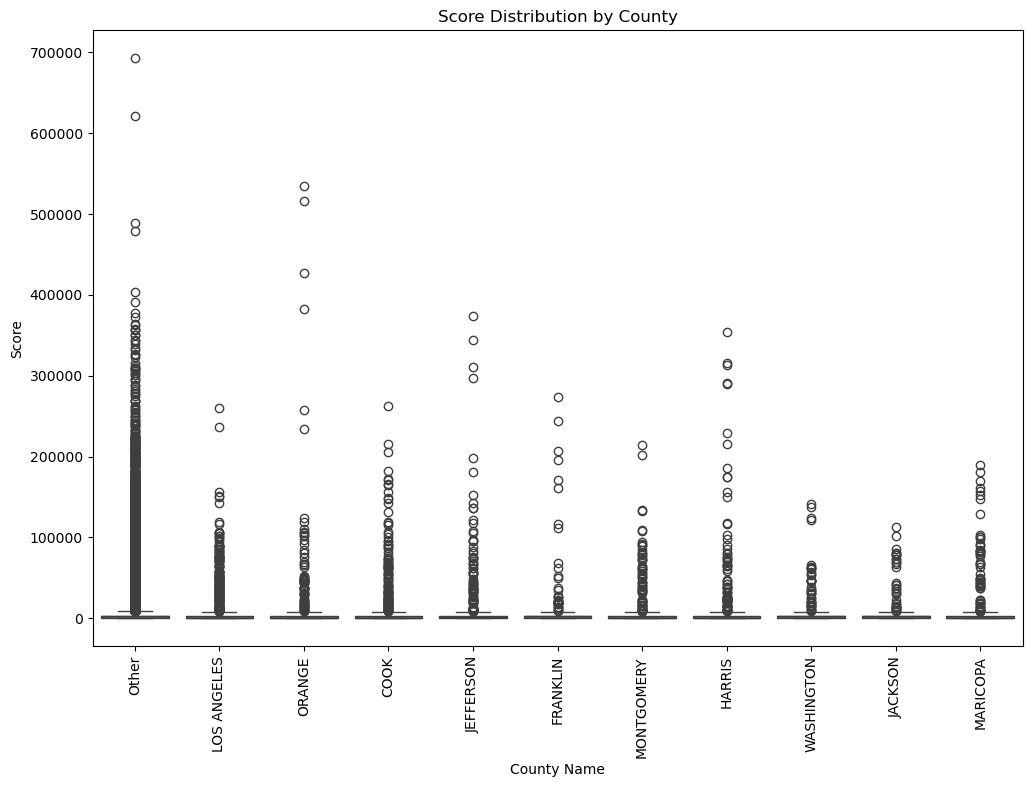

In [89]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='County Name', y='Score', data=data)
plt.xticks(rotation=90)
plt.title('Score Distribution by County')
plt.xlabel('County Name')
plt.ylabel('Score')
plt.show()

### 8. Outlier Detection

In [92]:
# Detecting outliers using Z-scores
data['Score zscore'] = (data['Score'] - data['Score'].mean()) / data['Score'].std()

In [94]:
# Filtering outliers
outliers = data[data['Score zscore'].abs() > 3]
print("Outliers based on Score Z-score:")
print(outliers[['Hospital Name', 'Score', 'Score zscore']])

Outliers based on Score Z-score:
                           Hospital Name     Score  Score zscore
182             CRESTWOOD MEDICAL CENTER   84758.0      6.763212
188             CRESTWOOD MEDICAL CENTER   84462.0      6.738626
278     PROVIDENCE ALASKA MEDICAL CENTER   95513.0      7.656530
284     PROVIDENCE ALASKA MEDICAL CENTER   79909.0      6.360451
816             CHI-ST VINCENT INFIRMARY  108132.0      8.704672
...                                  ...       ...           ...
222381   BAYLOR MEDICAL CENTER AT IRVING   62405.0      4.906557
222455               REGIONAL ONE HEALTH   72334.0      5.731266
222682                 SUBURBAN HOSPITAL   60602.0      4.756799
222683          KETTERING MEDICAL CENTER   84241.0      6.720270
222781     MEMORIAL HOSPITAL AT GULFPORT   77679.0      6.175226

[2546 rows x 3 columns]


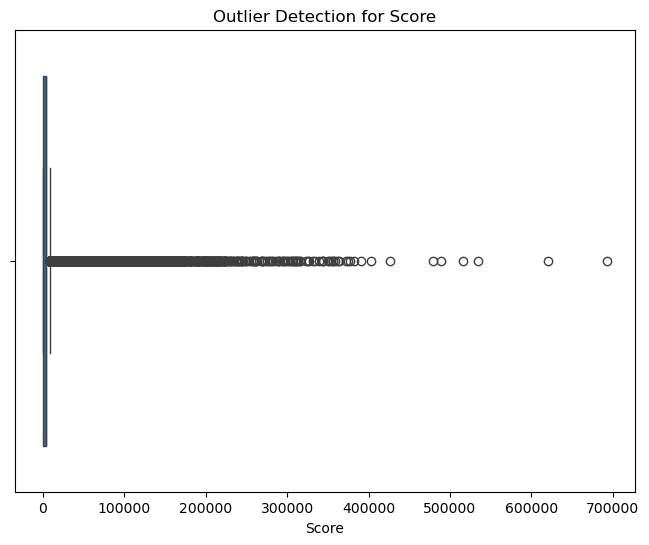

In [96]:
# Boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Score'])
plt.title('Outlier Detection for Score')
plt.xlabel('Score')
plt.show()

### 9. State-wise Performance

In [99]:
# Calculate mean score by state
state_mean_scores = data.groupby('State')['Score'].mean().sort_values(ascending=False)

print("Mean Scores by State:")
print(state_mean_scores)

Mean Scores by State:
State
NY    4335.733108
DC    4230.261969
DE    3883.174697
FL    3877.995134
NJ    3764.023971
MA    3753.627546
CT    3677.181494
NV    3675.476299
MI    3605.713081
MD    3554.684881
NC    3552.852449
MN    3458.711026
TN    3392.041348
AL    3391.247611
PA    3370.155103
MO    3340.556136
TX    3335.657854
MP    3333.035495
OH    3329.584409
SC    3325.662819
AZ    3321.539878
VA    3285.728301
SD    3282.429163
ND    3280.303389
GA    3277.876179
PR    3249.579822
KY    3225.174974
KS    3222.503574
NE    3220.805100
IA    3209.725407
MT    3181.924985
VT    3181.175909
OK    3180.872567
IL    3179.503339
ID    3168.732619
MS    3161.188343
WV    3156.990078
IN    3151.986437
AR    3140.305454
NM    3123.543999
CO    3119.349527
WA    3118.206735
RI    3116.537034
HI    3109.501844
WY    3107.993461
CA    3091.892424
ME    3090.480368
LA    3077.381241
OR    3063.906672
UT    3039.534862
WI    2999.631451
AK    2992.924006
NH    2903.203372
GU    2301.289851


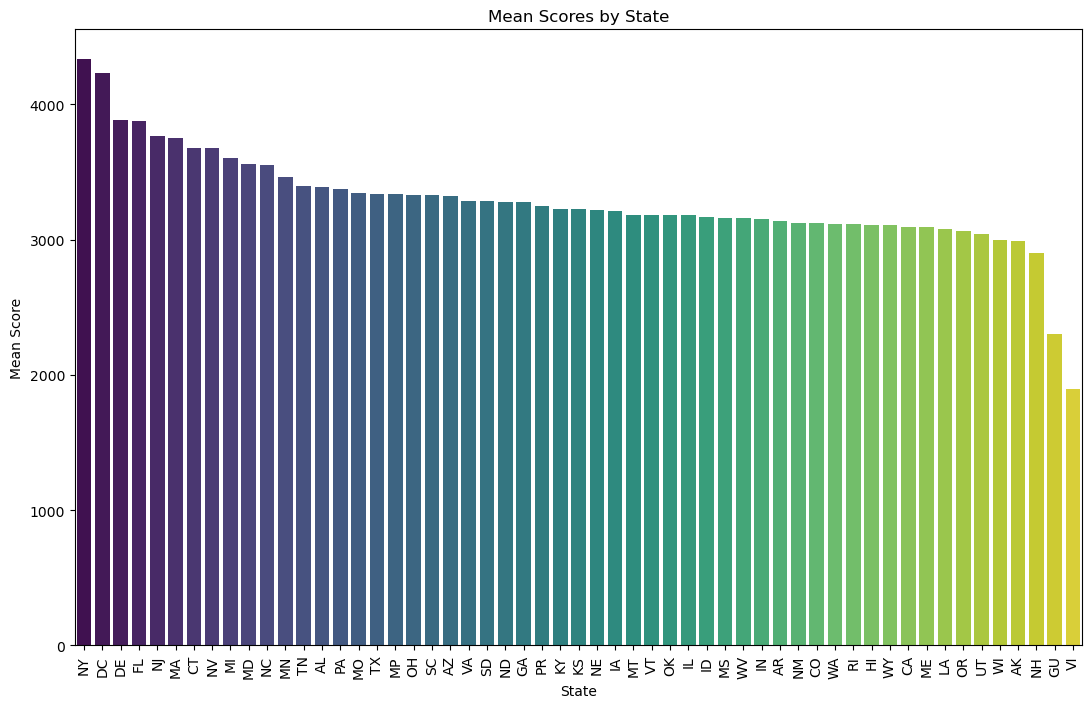

In [101]:
# Bar plot for mean scores by state
plt.figure(figsize=(13, 8))
sns.barplot(x=state_mean_scores.index, y=state_mean_scores.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Mean Scores by State')
plt.xlabel('State')
plt.ylabel('Mean Score')
plt.show()

### 10. County-wise Performance

In [104]:
# Calculate mean score by county
county_mean_scores = data.groupby('County Name')['Score'].mean().sort_values(ascending=False)

print("Mean Scores by County:")
print(county_mean_scores)

Mean Scores by County:
County Name
ORANGE         4541.535645
HARRIS         4499.343862
JEFFERSON      4072.843589
COOK           3765.309314
FRANKLIN       3594.221556
MARICOPA       3584.296755
Other          3304.226260
LOS ANGELES    3301.316563
MONTGOMERY     3249.242075
JACKSON        3032.605108
WASHINGTON     2954.287187
Name: Score, dtype: float64


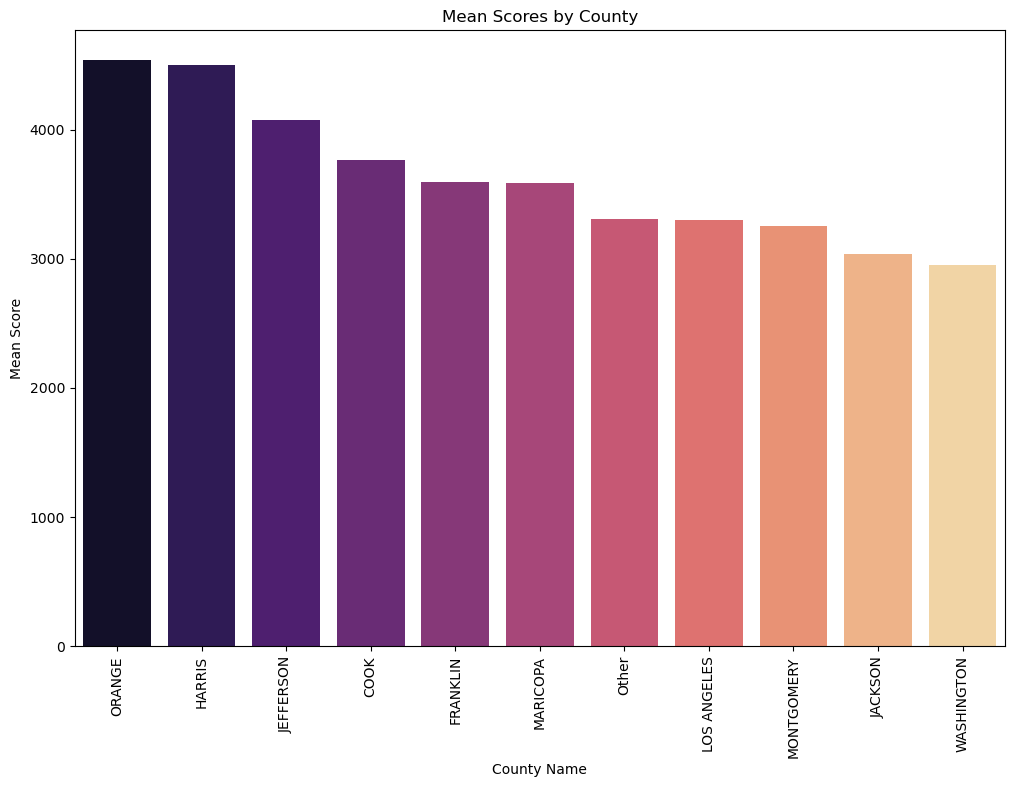

In [106]:
# Bar plot for mean scores by county
plt.figure(figsize=(12, 8))
sns.barplot(x=county_mean_scores.index, y=county_mean_scores.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Mean Scores by County')
plt.xlabel('County Name')
plt.ylabel('Mean Score')
plt.show()

### 11. Top Performing States

In [109]:
# Top 5 and Bottom 5 states by average score
top_states = state_mean_scores.head(5)
bottom_states = state_mean_scores.tail(5)

print("Top 5 States by Mean Score:")
print(top_states)

print("Bottom 5 States by Mean Score:")
print(bottom_states)

Top 5 States by Mean Score:
State
NY    4335.733108
DC    4230.261969
DE    3883.174697
FL    3877.995134
NJ    3764.023971
Name: Score, dtype: float64
Bottom 5 States by Mean Score:
State
WI    2999.631451
AK    2992.924006
NH    2903.203372
GU    2301.289851
VI    1896.686623
Name: Score, dtype: float64


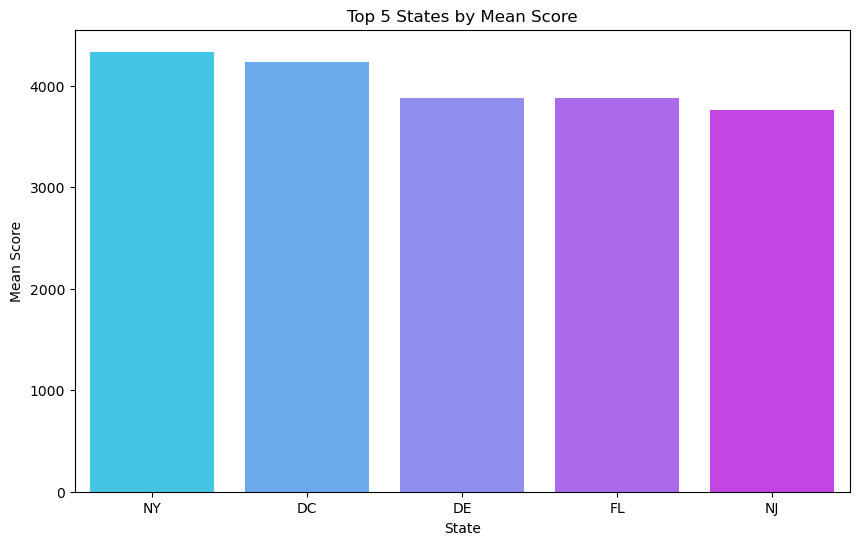

In [111]:
# Bar plot for top and bottom states
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette='cool')
plt.title('Top 5 States by Mean Score')
plt.xlabel('State')
plt.ylabel('Mean Score')
plt.show()

### 12. Distribution of Scores by Measure

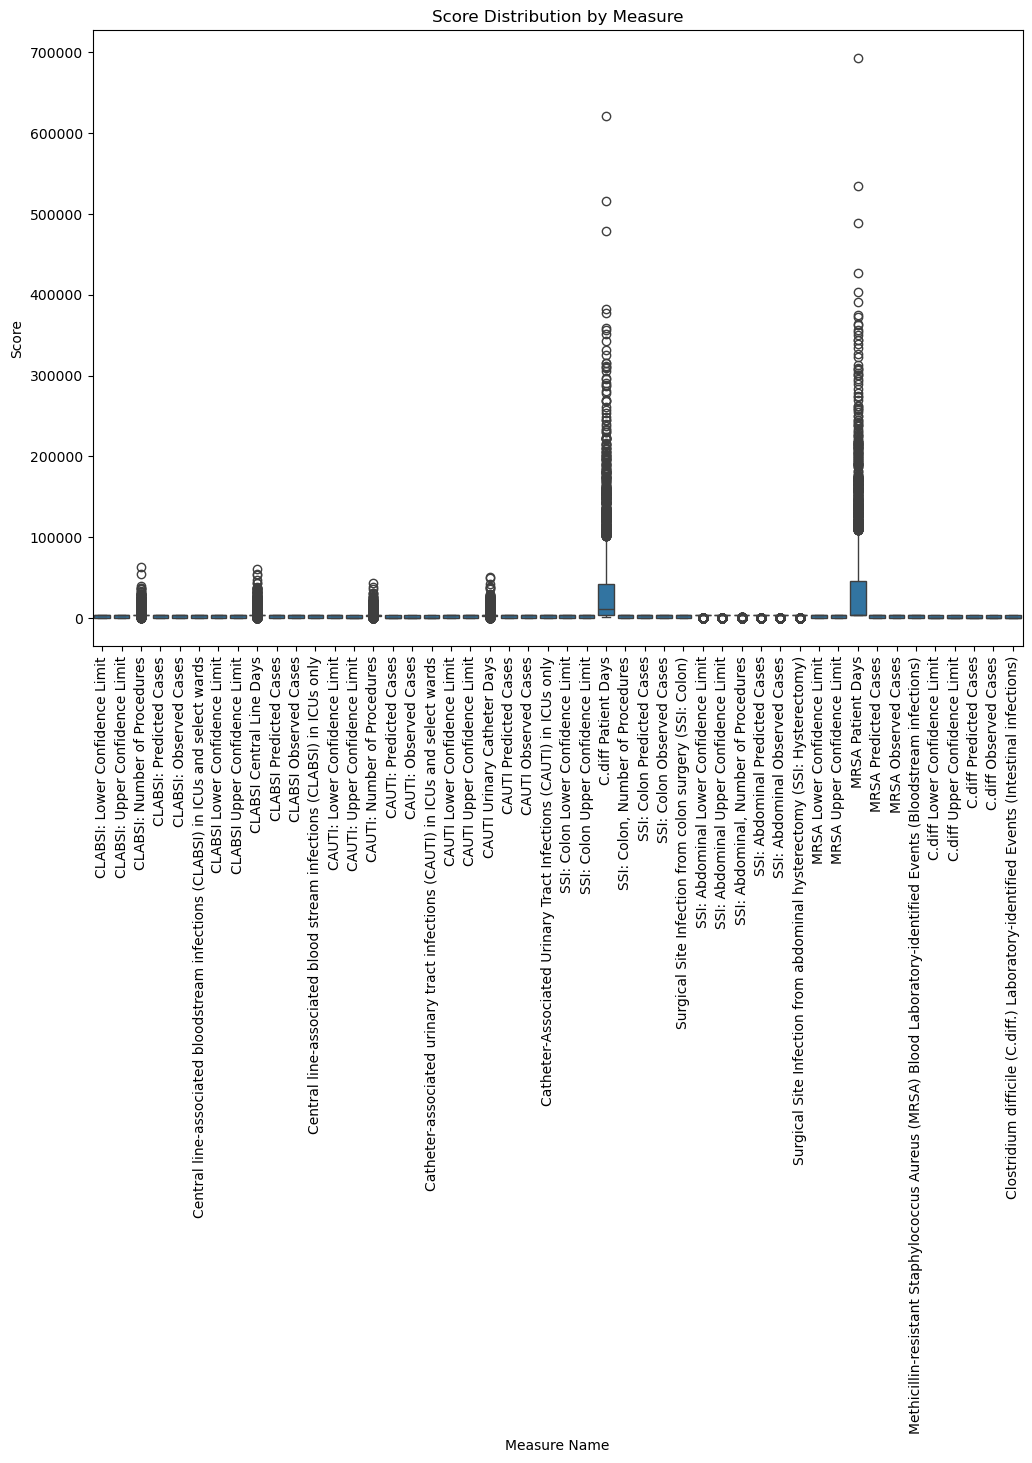

In [114]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Measure Name', y='Score', data=data)
plt.xticks(rotation=90)
plt.title('Score Distribution by Measure')
plt.xlabel('Measure Name')
plt.ylabel('Score')
plt.show()

### 13. Impact of Phone Numbers on Scores

In [117]:
# Convert phone numbers to categorical codes and check correlation
data['Phone Number Code'] = data['Phone Number'].astype('category').cat.codes
phone_score_correlation = data[['Phone Number Code', 'Score']].corr().iloc[0, 1]

In [119]:
print(f"Correlation between Phone Number and Score: {phone_score_correlation}")

Correlation between Phone Number and Score: -0.008175430945343468


### 14. Score by Measure Start Date

In [122]:
# Convert 'Measure Start Date' to datetime if it's not already
data['Measure Start Date'] = pd.to_datetime(data['Measure Start Date'], errors='coerce')

# Extract the year
data['Measure Start Year'] = data['Measure Start Date'].dt.year

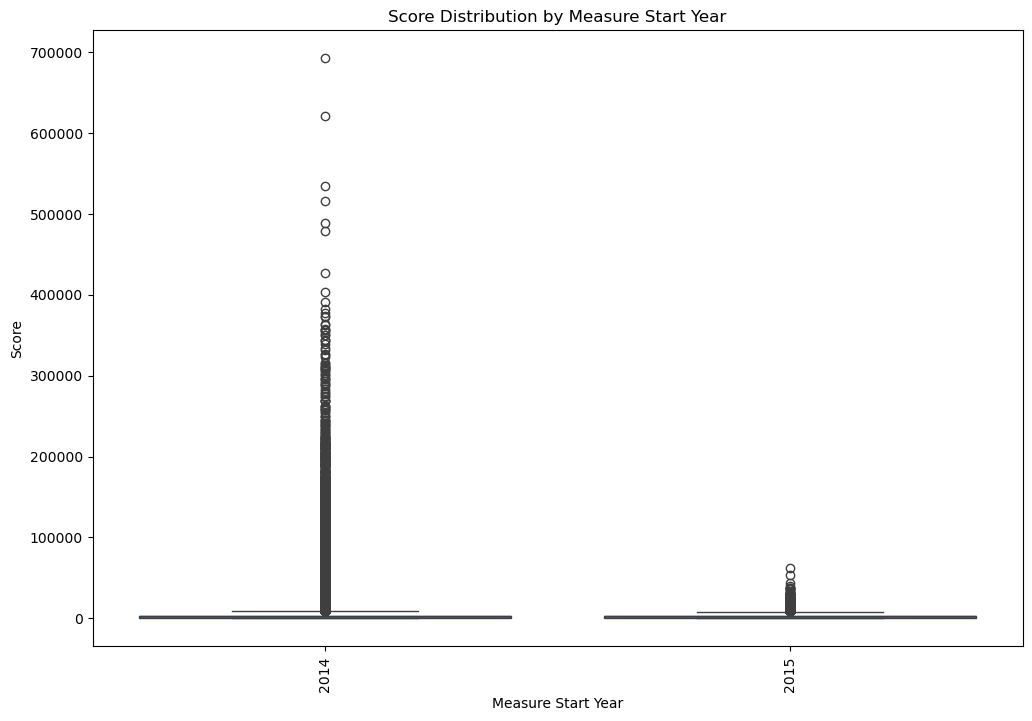

In [124]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Measure Start Year', y='Score', data=data)
plt.xticks(rotation=90)
plt.title('Score Distribution by Measure Start Year')
plt.xlabel('Measure Start Year')
plt.ylabel('Score')
plt.show()

### 15. Year-on-Year Improvement Analysis

In [127]:
# Ensure 'Measure Start Date' is in datetime format
data['Measure Start Date'] = pd.to_datetime(data['Measure Start Date'], errors='coerce')

# Extract year and create 'Year' column
data['Year'] = data['Measure Start Date'].dt.year

In [129]:
# Calculate average scores by year and measure the improvement
yearly_scores = data.groupby('Year')['Score'].mean()

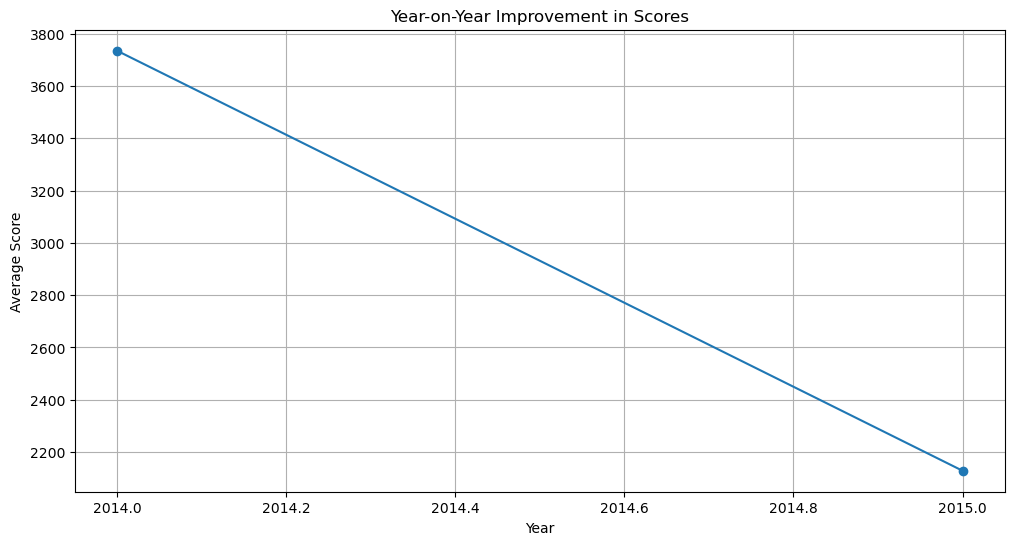

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_scores.index, yearly_scores.values, marker='o')
plt.title('Year-on-Year Improvement in Scores')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

### 16. Hospital Address Analysis

In [134]:
# Group by Address and calculate the mean score
address_performance = data.groupby('Address')['Score'].mean().sort_values()

In [136]:
# Select the top and bottom 10 addresses based on average score
top_addresses = address_performance.head(10)
bottom_addresses = address_performance.tail(10)

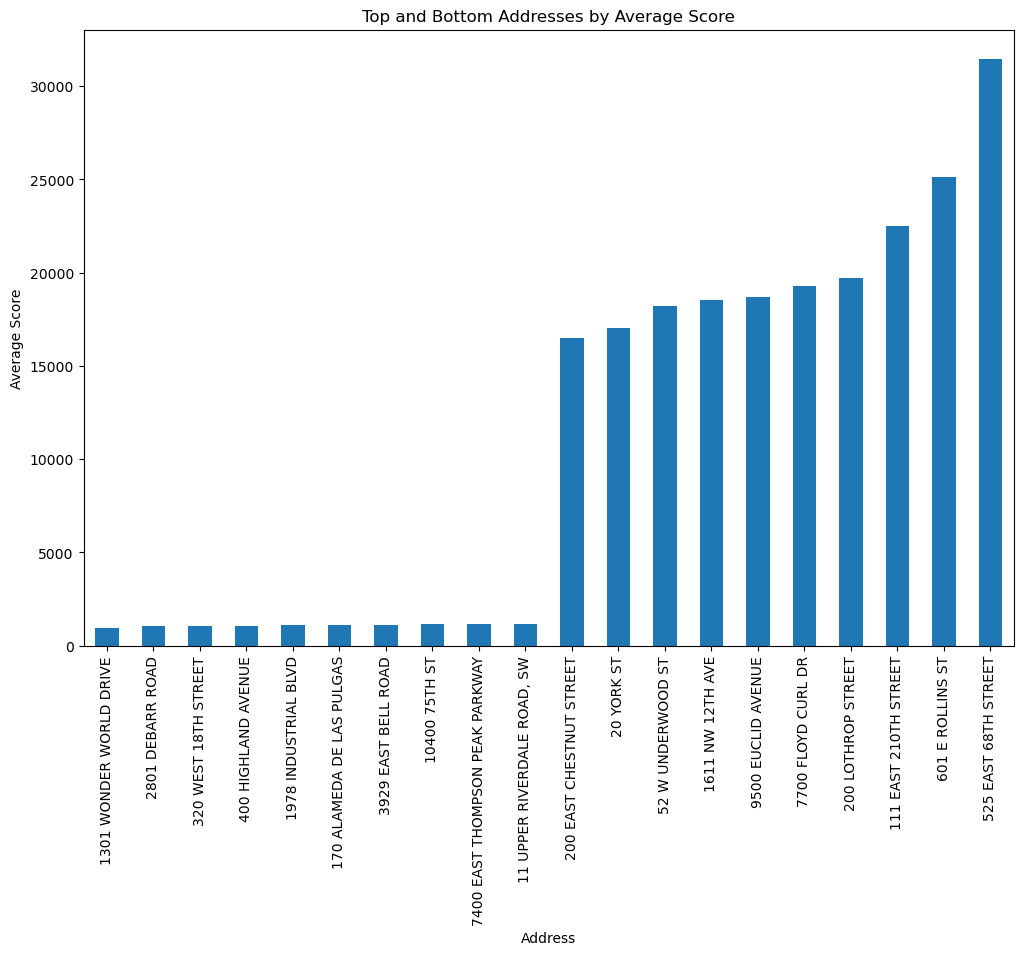

In [138]:
# Combine top and bottom addresses for plotting
combined_addresses = pd.concat([top_addresses, bottom_addresses])

plt.figure(figsize=(12, 8))
combined_addresses.plot(kind='bar')
plt.title('Top and Bottom Addresses by Average Score')
plt.xlabel('Address')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

In [140]:
import plotly.express as px

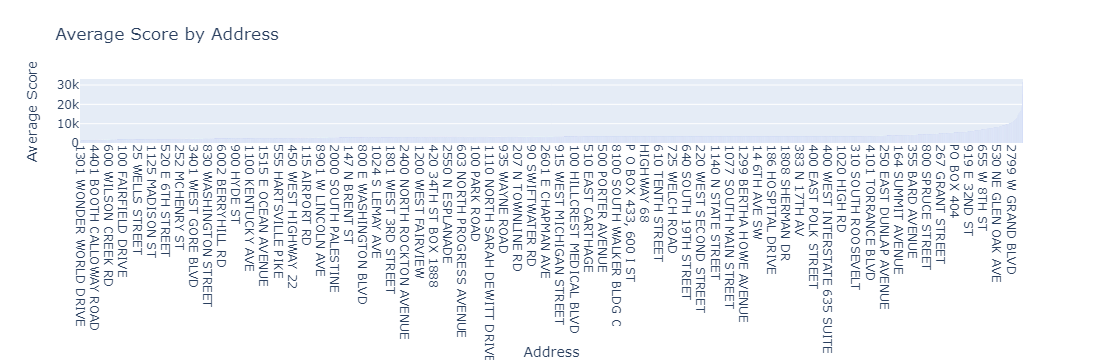

In [141]:
# Create an interactive bar plot
fig = px.bar(address_performance.reset_index(), x='Address', y='Score',
             title='Average Score by Address',
             labels={'Address': 'Address', 'Score': 'Average Score'},
             text='Score')
fig.update_xaxes(tickangle=90)
fig.show()

### 17. Performance Analysis Based on ZIP Code

In [145]:
def zip_code_range(zip_code):
    if zip_code < 10000:
        return '0-9999'
    elif zip_code < 20000:
        return '10000-19999'
    elif zip_code < 30000:
        return '20000-29999'
    else:
        return '30000+'

data['ZIP Code Range'] = data['ZIP Code'].apply(zip_code_range)

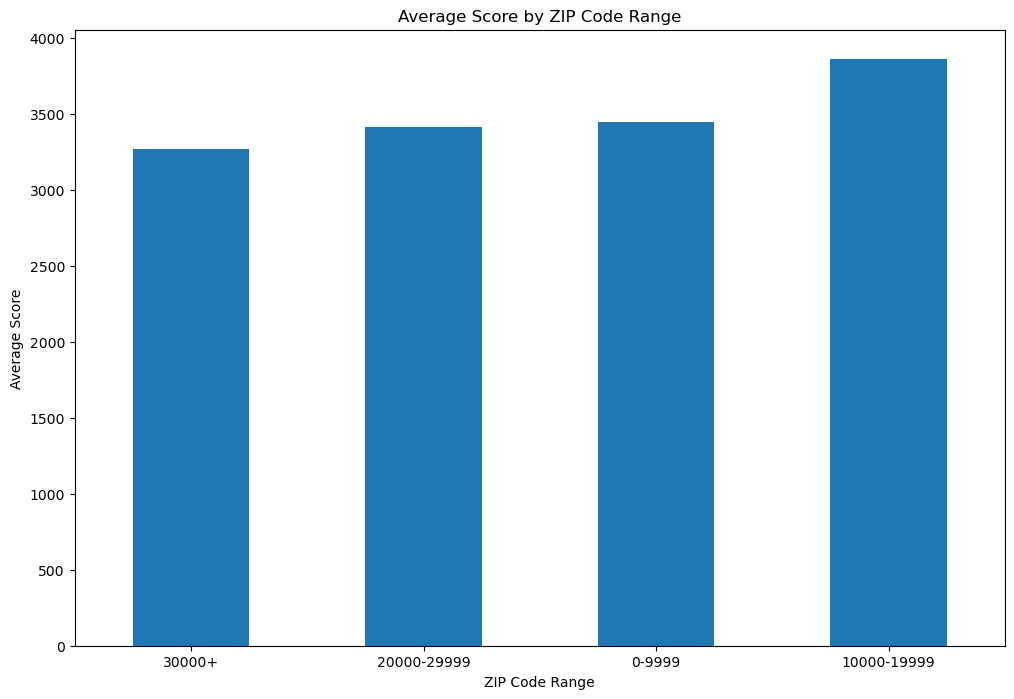

In [147]:
# Group by ZIP Code Range and calculate average scores
zip_code_range_performance = data.groupby('ZIP Code Range')['Score'].mean().sort_values()

plt.figure(figsize=(12, 8))
zip_code_range_performance.plot(kind='bar')
plt.title('Average Score by ZIP Code Range')
plt.xlabel('ZIP Code Range')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

### 18. Distribution of Scores by Measure ID

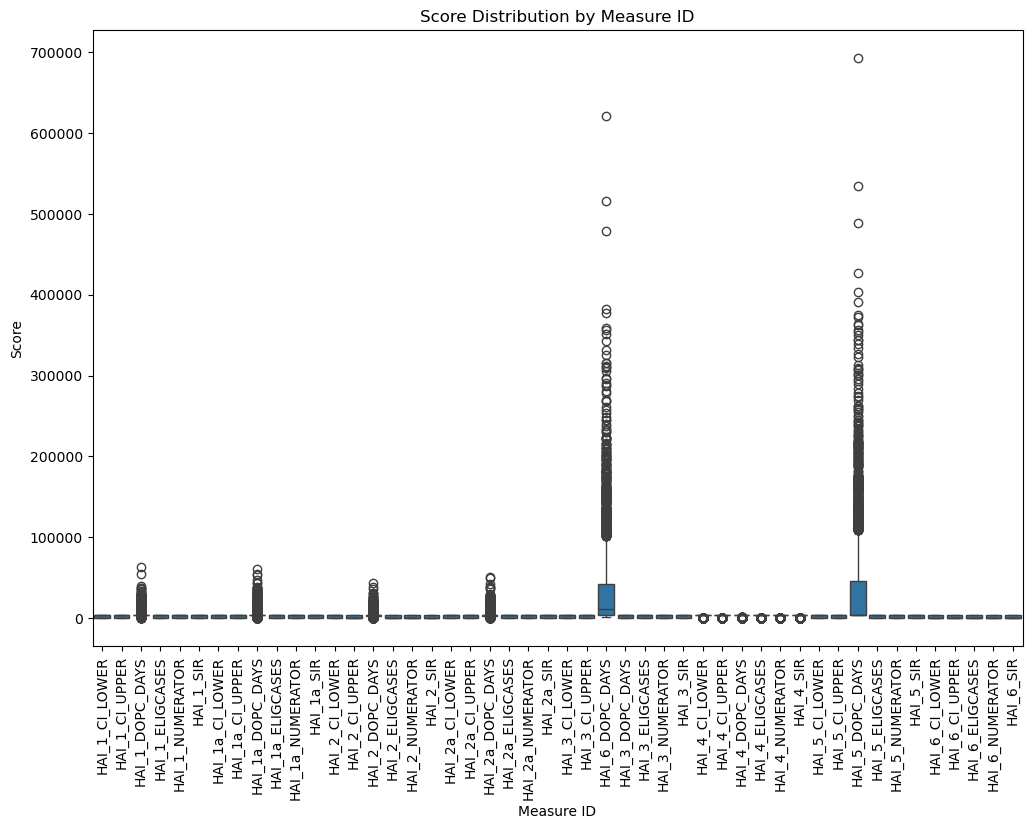

In [150]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Measure ID', y='Score', data=data)
plt.xticks(rotation=90)
plt.title('Score Distribution by Measure ID')
plt.xlabel('Measure ID')
plt.ylabel('Score')
plt.show()

### 19. Performance Analysis by Phone Number

In [153]:
# Group by Phone Number Code and calculate the mean score
phone_performance = data.groupby('Phone Number Code')['Score'].mean().sort_values()

In [155]:
# Select the top and bottom 10 phone numbers based on average score
top_phone_numbers = phone_performance.head(10)
bottom_phone_numbers = phone_performance.tail(10)

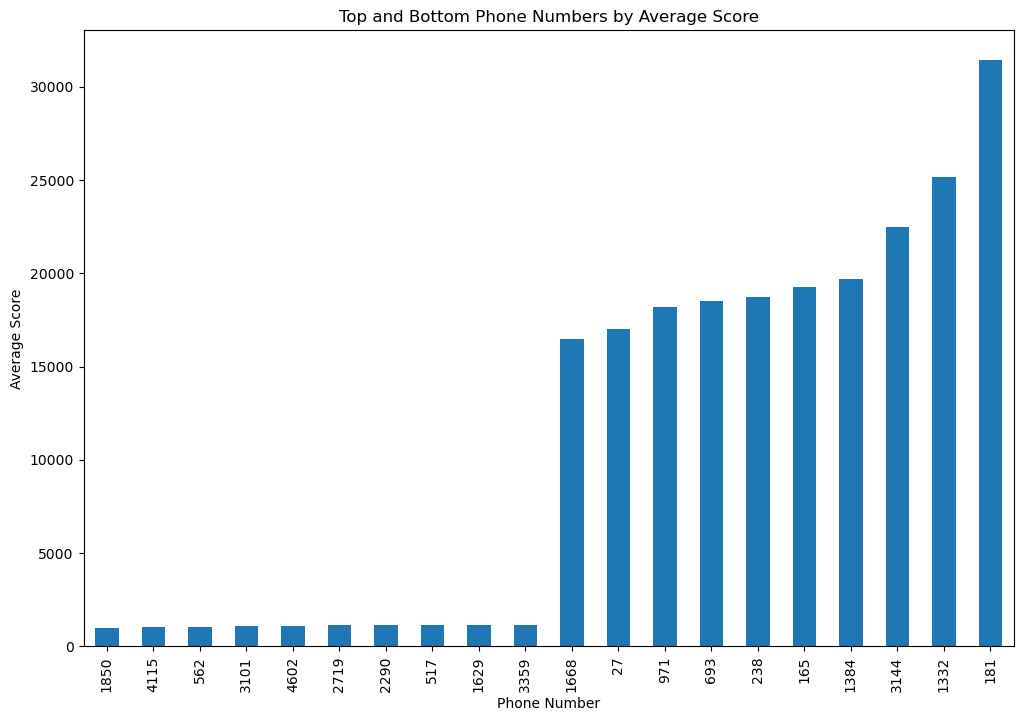

In [157]:
# Combine top and bottom phone numbers for plotting
combined_phone_numbers = pd.concat([top_phone_numbers, bottom_phone_numbers])

plt.figure(figsize=(12, 8))
combined_phone_numbers.plot(kind='bar')
plt.title('Top and Bottom Phone Numbers by Average Score')
plt.xlabel('Phone Number')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

### 20. Score Analysis by Hospital Name

In [160]:
# Group by Hospital Name and calculate the mean score
hospital_performance = data.groupby('Hospital Name')['Score'].mean().sort_values()

In [162]:
# Select the top and bottom 10 hospitals based on average score
top_hospitals = hospital_performance.head(10)
bottom_hospitals = hospital_performance.tail(10)

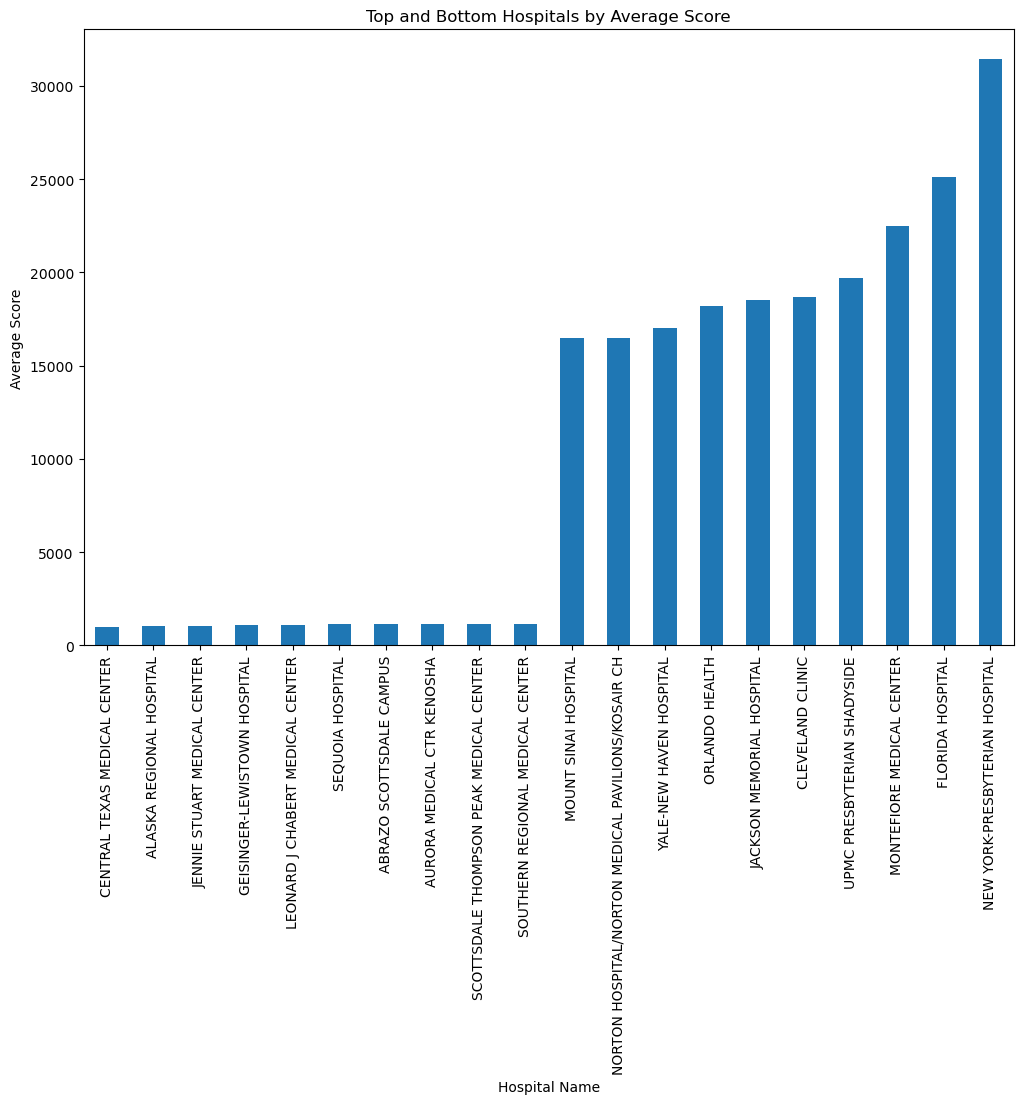

In [164]:
# Combine top and bottom hospitals for plotting
combined_hospitals = pd.concat([top_hospitals, bottom_hospitals])

plt.figure(figsize=(12, 8))
combined_hospitals.plot(kind='bar')
plt.title('Top and Bottom Hospitals by Average Score')
plt.xlabel('Hospital Name')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

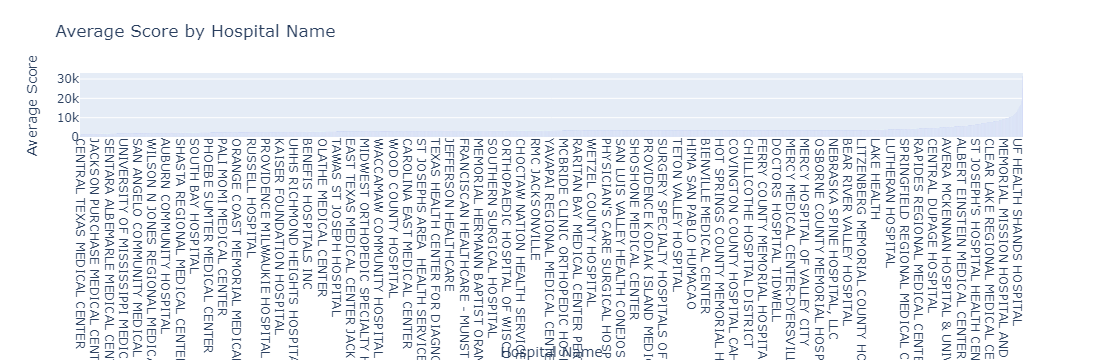

In [166]:
# Create an interactive bar plot
fig = px.bar(hospital_performance.reset_index(), x='Hospital Name', y='Score',
             title='Average Score by Hospital Name',
             labels={'Hospital Name': 'Hospital Name', 'Score': 'Average Score'},
             text='Score')
fig.update_xaxes(tickangle=90)
fig.show()

## Conclusion 

In conclusion, this project has provided a detailed examination of hospital performance scores, highlighting key trends and patterns across various dimensions. Through extensive data exploration and cleaning, followed by rigorous analysis and visualization, we have identified significant insights into the quality of healthcare provided by different hospitals. The analysis revealed variations in performance based on geographic and institutional factors, such as ZIP codes and hospital names, and demonstrated how scores have evolved over time. By comparing hospital performance against national benchmarks and assessing the variability in scores, we have pinpointed areas of excellence as well as opportunities for improvement. The findings and visualizations presented offer valuable guidance for healthcare stakeholders seeking to enhance service quality and address performance disparities effectively.